# Задача 1

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Генерация данных, шум порожден распределение Лапласа

In [2]:
X = np.random.randn(10000, 2)
w = np.array([1., 1.])
noise = np.random.laplace(size=10000) 
y = np.dot(X,w)+ 0.1*noise 
noise2 = np.random.laplace(size=10000) 




Text(0.5, 0, 'X[:,0]')

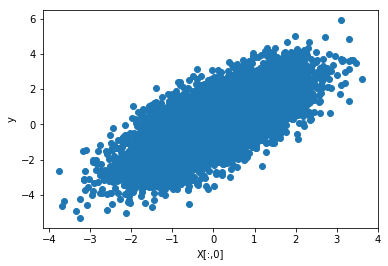

In [3]:
plt.scatter(X[:,0], y)
plt.ylabel('y')
plt.xlabel('X[:,0]')


Text(0, 0.5, 'y')

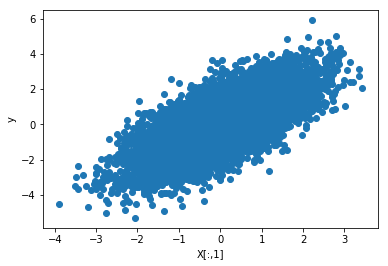

In [4]:
plt.scatter(X[:,1], y)
plt.xlabel('X[:,1]')
plt.ylabel('y')

Text(0, 0.5, 'y')

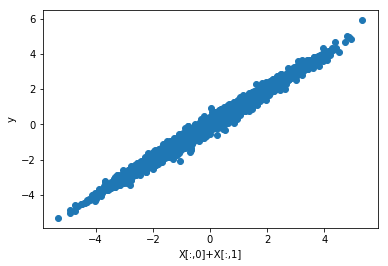

In [5]:
plt.scatter(np.sum(X, 1), y)
plt.xlabel('X[:,0]+X[:,1]')
plt.ylabel('y')

### Линейная регрессия МНК от первого столбца данных
Переменная значима, коэффицент нельзя обнулить

In [6]:
from statsmodels.regression.linear_model import OLS
dataframe =   pd.DataFrame({'y':y,'x1':X[:,0]})
simple_model = OLS.from_formula('y~x1 -1', dataframe).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     9564.
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:15:50   Log-Likelihood:                -14275.
No. Observations:               10000   AIC:                         2.855e+04
Df Residuals:                    9999   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9926      0.010     97.794      0.000       0.973       1.012
==============================================================================
Omnibus:                        1.817   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.813
Skew:                           0.015   Prob(JB):                        0.404
Kurtosis:                       2.941   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Линейная регрессия МНК от двух столбцов данных

In [7]:
from statsmodels.regression.linear_model import OLS
dataframe =   pd.DataFrame({'y':y,'x1':X[:,0], 'x2' :X[:,1]})
model_mn = OLS.from_formula('y~x1 + x2 + x1:x2-1', dataframe).fit()
model_mn.summary()
#можно увидеть, что поправка на множественность гипотез влияния не играет

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.386e+05
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:15:57   Log-Likelihood:                 5524.3
No. Observations:               10000   AIC:                        -1.104e+04
Df Residuals:                    9997   BIC:                        -1.102e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9996      0.001    713.118      0.000       0.997       1.002
x2             1.0001      0.001    717.148      0.000       0.997       1.003
x1:x2         -0.0004      0.001     -0.273      0.785      -0.003       0.002
==============================================================================
Omnibus:                      726.316   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3816.658
Skew:                          -0.087   Prob(JB):                         0.00
Kurtosis:                       6.022   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from statsmodels.regression.linear_model import OLS
dataframe =   pd.DataFrame({'y':y,'x1':X[:,0], 'x2' :X[:,1]})
model2 = OLS.from_formula('y~x1 + x2 -1', dataframe).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.080e+05
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:15:58   Log-Likelihood:                 5524.3
No. Observations:               10000   AIC:                        -1.104e+04
Df Residuals:                    9998   BIC:                        -1.103e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9996      0.001    713.207      0.000       0.997       1.002
x2             1.0001      0.001    717.203      0.000       0.997       1.003
==============================================================================
Omnibus:                      726.373   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3816.432
Skew:                          -0.087   Prob(JB):                         0.00
Kurtosis:                       6.021   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model2.params

x1    0.999348
x2    1.000325
dtype: float64

Text(0, 0.5, 'y')

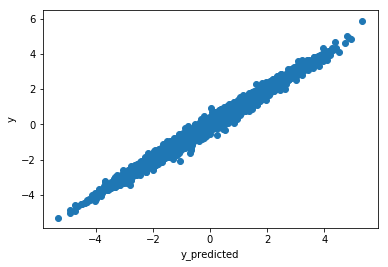

In [9]:
y2_predicted = X.dot(model2.params)
plt.scatter(y2_predicted, y)
plt.xlabel('y_predicted')
plt.ylabel('y')


### Линейная регрессия от столбцов данных + новый лапласовский шум
Видим, что коэффиценты перед столбцами матрицы значимы, а перед шумом можно занулить

In [10]:
from statsmodels.regression.linear_model import OLS
dataframe =   pd.DataFrame({'y':y, 'noise2':noise2, 'x1':X[:,0], 'x2':X[:,1]})
complex_model = OLS.from_formula('y~x1 + x2 + noise2 -1', dataframe).fit()
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.386e+05
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:16:03   Log-Likelihood:                 5524.4
No. Observations:               10000   AIC:                        -1.104e+04
Df Residuals:                    9997   BIC:                        -1.102e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9996      0.001    713.176      0.000       0.997       1.002
x2             1.0001      0.001    717.174      0.000       0.997       1.003
noise2        -0.0005      0.001     -0.480      0.631      -0.002       0.001
==============================================================================
Omnibus:                      726.134   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3813.814
Skew:                          -0.087   Prob(JB):                         0.00
Kurtosis:                       6.020   Cond. No.                         1.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Теперь реализуем метод наименьших модулей

In [11]:
from scipy.optimize import minimize
def fit(X, params):
    return X.dot(params)

def cost_function(params, X, y):
    return np.sum(np.abs(y - fit(X, params)))

In [12]:
cost_function(w, X, y)

987.0514609910371

In [13]:
x0 = [0.9, 1.]
output = minimize(cost_function, x0, args=(X, y), method = 'Nelder-Mead')
y_hat = fit(X, output.x)
print(output.x)

[1.00015504 1.00190746]


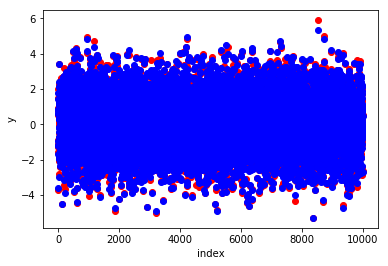

Text(0, 0.5, 'y_predicted')

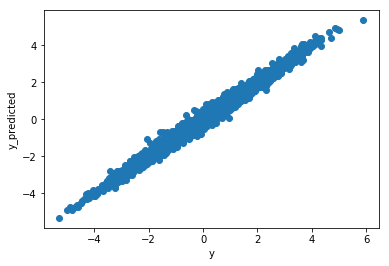

In [14]:
fig = plt.figure()
ax = plt.axes()

ax.plot(y, 'o', color='red')
ax.plot(y_hat, 'o', color='blue')
plt.xlabel('index')
plt.ylabel('y')
plt.show()

plt.scatter(y,y_hat)
plt.xlabel('y')
plt.ylabel('y_predicted')

In [15]:
print(output)

 final_simplex: (array([[1.00015504, 1.00190746],
       [1.00011619, 1.00189741],
       [1.00013595, 1.0018749 ]]), array([986.90224027, 986.90224748, 986.90232941]))
           fun: 986.902240266101
       message: 'Optimization terminated successfully.'
          nfev: 54
           nit: 29
        status: 0
       success: True
             x: array([1.00015504, 1.00190746])


output.x - это наши параметры, которые оцениваются в модели

### А теперь квадратичная модель для одной переменной

In [16]:
X_sq = np.random.randn(10000)
noise_sq = np.random.laplace(size=10000) 
y_sq = X_sq**2+ 0.1*noise_sq
noise2_sq = np.random.laplace(size=10000) 

Text(0, 0.5, 'y_sq')

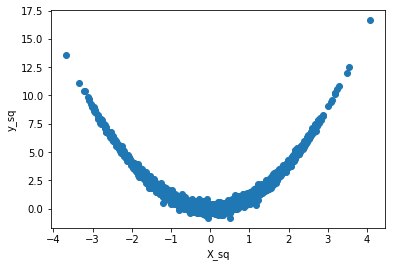

In [17]:
plt.scatter(X_sq, y_sq)
plt.xlabel('X_sq')
plt.ylabel('y_sq')

Text(0, 0.5, 'y_sq')

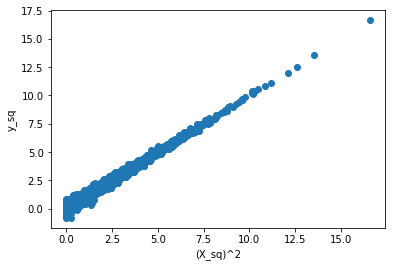

In [18]:
plt.scatter(X_sq**2, y_sq)
plt.xlabel('(X_sq)^2')
plt.ylabel('y_sq')

In [19]:
from statsmodels.regression.linear_model import OLS
model3 = OLS(y_sq, X_sq).fit()
#print(model3.params)
y_sq_predicted3 = model3.predict(X_sq)

In [20]:
model4 = OLS(y_sq, X_sq**2).fit()
y_sq_predicted4 = model4.predict(X_sq**2)

Text(0, 0.5, 'y_sq')

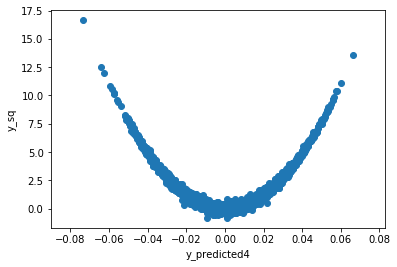

In [21]:
plt.scatter(y_sq_predicted3, y_sq)
plt.xlabel('y_predicted4')
plt.ylabel('y_sq')

Text(0, 0.5, 'y_sq')

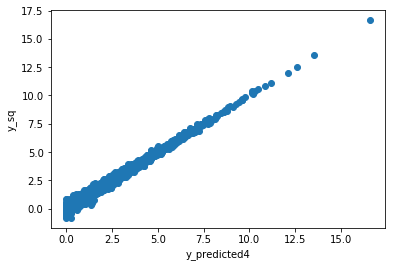

In [22]:
plt.scatter(y_sq_predicted4, y_sq)
plt.xlabel('y_predicted4')
plt.ylabel('y_sq')

## Метод наименьших модулей

In [23]:
def fit2(X, params):
    return X * (params*10000)

def cost_function2(params, X, y):
    return np.sum(np.abs(y - fit2(X, params)))

In [24]:
x0 = [0.9]
output_sq = minimize(cost_function2, x0, args=(X_sq**2, y_sq))
y_hatsq = fit2(X_sq**2, output_sq.x)
print(y_hatsq)

[0.06812293 0.07618826 0.0133952  ... 0.22248439 0.11987123 0.26184778]


Text(0, 0.5, 'y_sq')

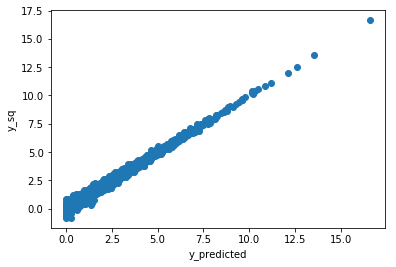

In [25]:
plt.scatter(y_hatsq, y_sq)
plt.xlabel('y_predicted')
plt.ylabel('y_sq')

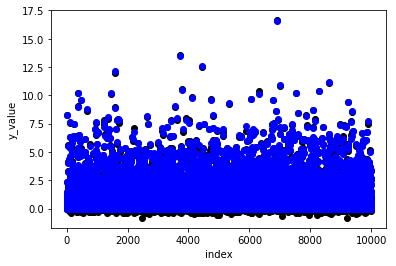

Text(0, 0.5, 'y_predicted')

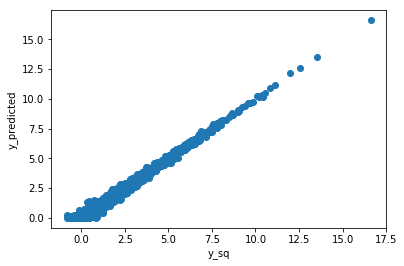

In [26]:
fig = plt.figure()
ax = plt.axes()

ax.plot(y_sq, 'o', color='black')
ax.plot(y_hatsq, 'o', color='blue')
plt.xlabel('index')
plt.ylabel('y_value')

plt.show()

plt.scatter(y_sq,y_hatsq)
plt.xlabel('y_sq')
plt.ylabel('y_predicted')

### Генерация различных исходных данных, и вычисление для них оптимальные параметры регресии с помощью МНК и МНМ.

In [27]:
from statsmodels.regression.linear_model import OLS
mnk_params = []
mnm_params = []
x0_sum = []
for i in range(1000):
    ############Генерация данных###################
    X = np.random.randn(10000, 2)
    w = np.array([1., 1.])
    noise = np.random.laplace(size=10000) 
    y = np.dot(X,w)+ 0.1*noise
    #####################МНК##############################
    dataframe =   pd.DataFrame({'y':y,'x1':X[:,0], 'x2' :X[:,1]})
    model_i = OLS.from_formula('y~x1 + x2 -1', dataframe).fit()
    mnk_params.append([model_i.params.x1, model_i.params.x2])
for i in range(1000):
    ############Генерация данных###################
    X = np.random.randn(10000, 2)
    w = np.array([1., 1.])
    noise = np.random.laplace(size=10000) 
    y = np.dot(X,w)+ 0.1*noise    
    ########################Наименьшие модули#######################33
    x0 = [0.9, 1.]
    output_i = minimize(cost_function, x0, args=(X, y), method = 'Nelder-Mead')
    y_hat = fit(X, output_i.x)
    mnm_params.append(list(output_i.x))


In [28]:
output_i.x

array([0.99973061, 1.00026881])

#### Проверим на нормальность выборки из параметров

In [29]:
mnk_param = np.asarray(mnk_params)
mnm_param = np.asarray(mnm_params)

In [30]:
st.shapiro(mnk_param[:,0])

(0.9973897933959961, 0.1085146814584732)

In [31]:
st.shapiro(mnm_param[:,0])

(0.9977419972419739, 0.19064876437187195)

In [32]:
st.shapiro(mnk_param[:,1])

(0.9968716502189636, 0.04620076343417168)

In [33]:
st.shapiro(mnm_param[:,1])

(0.998801052570343, 0.7555975317955017)

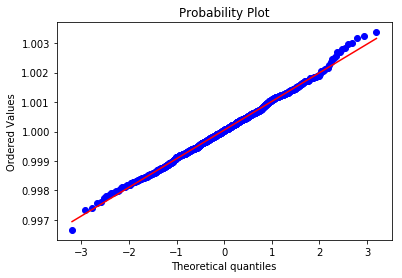

In [34]:
_=st.probplot(mnm_param[:,0], plot=plt)

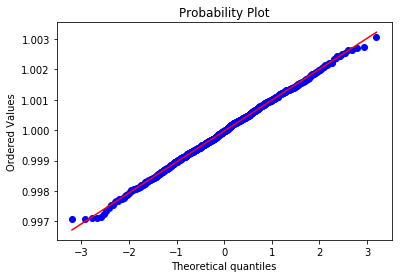

In [35]:
_=st.probplot(mnm_param[:,1], plot=plt)

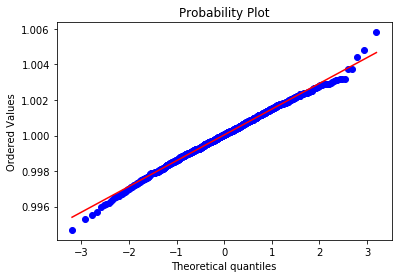

In [36]:
_=st.probplot(mnk_param[:,0], plot=plt)

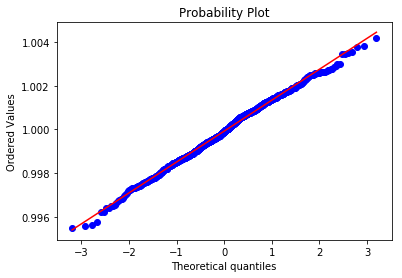

In [37]:
_=st.probplot(mnk_param[:,1], plot=plt)

 ## Сравнение моделей
 
 Модель с наименьшей дисперсией будем считать предпочтительной.
 Поставим гипотезу
 
$H_0: \sigma_1 = \sigma_2$

против альтернативы 

$H_1: \sigma_1 > \sigma_2 $

Первая выборка из МНК, вторая из МНМ

Выборки независимые, нормальные, следовательно применим F-критерий Фишера

In [38]:
mnk_param = np.asarray(mnk_params)
mnm_param = np.asarray(mnm_params)
F_stat = np.std(mnk_param[:,1], ddof = 1)**2/np.std(mnm_param[:,1], ddof =1)**2
print(F_stat)

1.9389463895826733


In [39]:
alpha = 0.05
value = st.f.cdf(F_stat, 999, 999)
if (value < 1-alpha):
    print('Reject H0')
else: print('Accept H0')
print(value) 

Accept H0
0.9999999999999999


По F-test получаем, что дисперсия для МНК метода больше, следовательно МНМ дает более оптимальные оценки. Это согласуется с тем, что МНМ оценки в случае лапласовского шума дают максимум функции правдоподобия.

Теперь поставим гипотезу
 
$H_0: \sigma_1 = \sigma_2$

против альтернативы 

$H_1: \sigma_1 < \sigma_2 $

Первая выборка из МНК, вторая из МНМ. Сравним результаты

In [40]:
alpha = 0.05
value = st.f.cdf(F_stat, 999, 999)
if (value < alpha):
    print('Reject H0')
else: print('Accept H0')
print(value) 

Accept H0
0.9999999999999999


Значит, на уровне значимости $0.05$ мы можем утверждать, что критерий наименьших модулей более оптимальный, чем МНК

### Что если шум из нормального распределения? 

Что-нибудь принципиально поменяется?

$H_0: \sigma_1 = \sigma_2$


$H_1: \sigma_1 < \sigma_2 $

In [41]:
from statsmodels.regression.linear_model import OLS
mnk_params = []
mnm_params = []
x0_sum = []
for i in range(1000):
    ############Генерация данных###################
    X = np.random.randn(10000, 2)
    w = np.array([1., 1.])
    noise = np.random.randn(10000) 
    y = np.dot(X,w)+ 0.1*noise
    #####################МНК##############################
    dataframe =   pd.DataFrame({'y':y,'x1':X[:,0], 'x2' :X[:,1]})
    model_i = OLS.from_formula('y~x1 + x2 -1', dataframe).fit()
    mnk_params.append([model_i.params.x1, model_i.params.x2])
for i in range(1000):
    ############Генерация данных###################
    X = np.random.randn(10000, 2)
    w = np.array([1., 1.])
    noise = np.random.randn(10000) 
    y = np.dot(X,w)+ 0.1*noise    
    ########################Наименьшие модули#######################33
    x0 = [0.9, 1.]
    output_i = minimize(cost_function, x0, args=(X, y), method = 'Nelder-Mead')
    y_hat = fit(X, output_i.x)
    mnm_params.append(list(output_i.x))


In [42]:
mnk_param = np.asarray(mnk_params)
mnm_param = np.asarray(mnm_params)
F_stat = np.std(mnk_param[:,1], ddof = 1)**2/np.std(mnm_param[:,1], ddof =1)**2
print(F_stat)

0.6417546856841025


In [43]:
alpha = 0.05
value = st.f.cdf(F_stat, 999, 999)
if (value < alpha):
    print('Reject H0')
else: print('Accept H0') 
print(value)

Reject H0
1.4815374884103364e-12


Для нормального шума наблюдается противоположная ситуация. Все логично. Ведь ОМП совпадает с МНК оценкой в случае гауссовского шума, а ОМП является оптимальной оценкой в классе состоятельных.

## Вывод

Из графиков не наблюдается существенного отличия МНК и МНМ методов на нашей выборке. Однако, при многократной генерации выборки линейной модели и получения параметров, можно сказать, что метод наименьших модулей дает оценку с меньшей диспресией, чем метод наименьших квадратов в случае лапласовского шума. В случае гауссовского шума МНК дает более состоятельную оценку параметров.